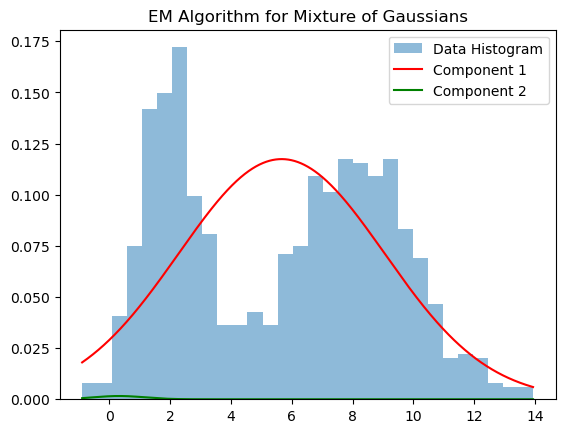

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def generate_data(mu1, sigma1, mu2, sigma2, weight1, weight2, size):
    data = []
    for _ in range(size):
        if np.random.rand() < weight1:
            data.append(np.random.normal(mu1, sigma1))
        else:
            data.append(np.random.normal(mu2, sigma2))
    return np.array(data)

def em_algorithm(data, k=2, max_iterations=100, tol=1e-4):
    n = len(data)
    # Initialize parameters randomly
    means = np.random.randn(k)
    variances = np.random.rand(k)
    weights = np.random.rand(k)
    weights /= np.sum(weights)

    for iteration in range(max_iterations):
        # Expectation step
        responsibilities = np.zeros((n, k))
        for j in range(k):
            responsibilities[:, j] = weights[j] * norm.pdf(data, means[j], np.sqrt(variances[j]))
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # Maximization step
        Nk = np.sum(responsibilities, axis=0)
        means = np.sum(responsibilities * data[:, np.newaxis], axis=0) / Nk
        variances = np.sum(responsibilities * (data[:, np.newaxis] - means) ** 2, axis=0) / Nk
        weights = Nk / n

        # Check for convergence
        if np.max(np.abs(Nk - weights * n)) < tol:
            break

    return means, variances, weights

def plot_data_and_distribution(data, means, variances, weights):
    x = np.linspace(np.min(data), np.max(data), 1000)
    plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Histogram')
    plt.plot(x, weights[0] * norm.pdf(x, means[0], np.sqrt(variances[0])), 'r-', label='Component 1')
    plt.plot(x, weights[1] * norm.pdf(x, means[1], np.sqrt(variances[1])), 'g-', label='Component 2')
    plt.title('EM Algorithm for Mixture of Gaussians')
    plt.legend()
    plt.show()

# Generate synthetic data
np.random.seed(42)
data = generate_data(2, 1, 8, 2, 0.4, 0.6, 1000)

# Apply EM algorithm
means, variances, weights = em_algorithm(data)

# Plot the results
plot_data_and_distribution(data, means, variances, weights)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Admin\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


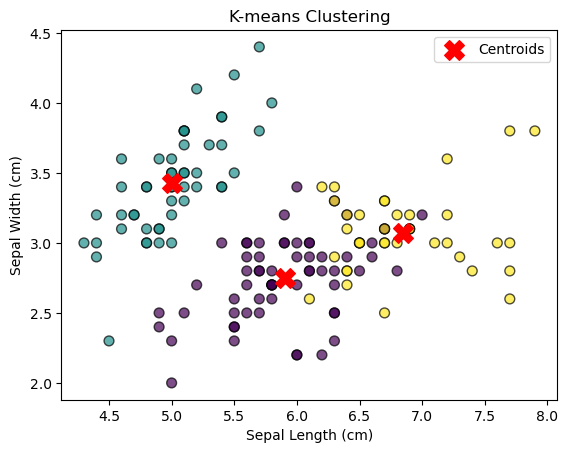

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Choose the number of clusters (K)
k = 3

# Create KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


In [7]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data
transactions = [
    ['bread', 'milk', 'beer'],
    ['bread', 'diapers', 'eggs'],
    ['milk', 'diapers', 'beer', 'cola'],
    ['bread', 'milk', 'diapers', 'beer'],
    ['bread', 'milk', 'diapers', 'cola']
]

# Transform data to one-hot encoding format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)



Frequent Itemsets:
    support                      itemsets
0       0.6                        (beer)
1       0.8                       (bread)
2       0.4                        (cola)
3       0.8                     (diapers)
4       0.2                        (eggs)
5       0.8                        (milk)
6       0.4                 (beer, bread)
7       0.2                  (beer, cola)
8       0.4               (beer, diapers)
9       0.6                  (beer, milk)
10      0.2                 (cola, bread)
11      0.6              (diapers, bread)
12      0.2                 (eggs, bread)
13      0.6                 (milk, bread)
14      0.4               (diapers, cola)
15      0.4                  (milk, cola)
16      0.2               (diapers, eggs)
17      0.6               (diapers, milk)
18      0.2        (beer, diapers, bread)
19      0.4           (beer, milk, bread)
20      0.2         (beer, diapers, cola)
21      0.2            (beer, milk, cola)
22      0.4    

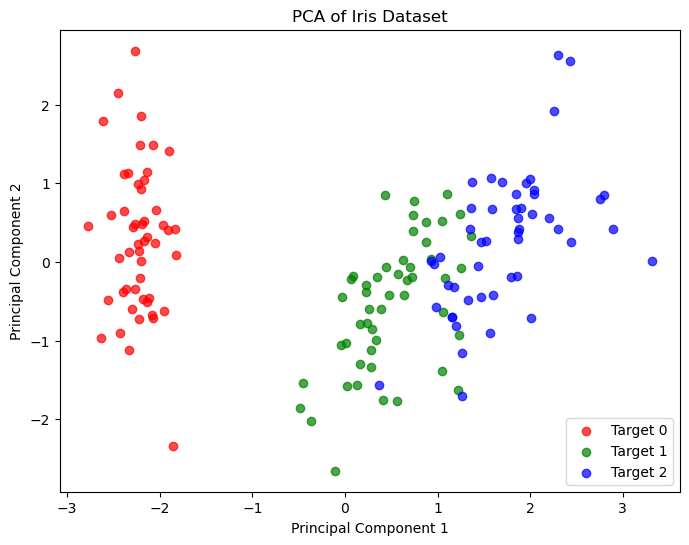

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the data (mean=0 and variance=1)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Apply PCA with two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Plot the PCA results
plt.figure(figsize=(8, 6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'Principal Component 1'],
                df_pca.loc[indices_to_keep, 'Principal Component 2'],
                c=color,
                label=f'Target {target}',
                alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()
